# Customer Segmentation Analysis: A Deep Dive into Marketing Strategy

## Project Overview

This project provides a comprehensive analysis of customer data to identify distinct customer segments and understand their characteristics. The primary goal is to empower strategic marketing decisions by profiling customer groups based on demographics, professional backgrounds, spending habits, and other key attributes. This analysis aims to inform targeted campaigns, product development, and market expansion strategies.

## Table of Contents

1.  [Customer Distribution Across Segments](#scrollTo=EjSRnITbJm71)
2.  [Most Popular Profession Per Customer Segment](#scrollTo=_rYAKiJeJnNd)
3.  [Demographic Characteristics of Each Segment](#scrollTo=ckICnArghpLA)
4.  [Customer Segment and Revenue Generation](#scrollTo=Ulcfiq5BhpW0)
5.  [Work Experience and Spending Behavior Correlation](#scrollTo=rgca8nyChpjN)
6.  [Education Level and Customer Segmentation](#scrollTo=DDFdyhagJn1t)
7.  [Strongest Demographic Predictors of High-Value Segments](#scrollTo=XjNhnq_OqfUj)
8.  [Optimal Customer Profile for New Market Targeting](#scrollTo=kFglRAx2qfhC)
9.  [Marital Status, Family Size, and Spending Patterns by Segment](#scrollTo=ITqciisyU2xr)
10. [Segment Expansion Opportunity Analysis](#scrollTo=9SXevhliWmwt)

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train_table = pd.read_csv('train.csv')

spending_score_mapping = {'Low': 1, 'Average': 2, 'High': 3}
df_train_table['Numerical_Spending_Score'] = df_train_table['Spending_Score'].map(spending_score_mapping)

print(df_train_table.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  Numerical_Spending_Score  
0            Low          4.0  Cat_4            D                         1  
1        Average          3.0  Cat_4            A                         2  
2            Low          1.0  Cat_6            B                         1  
3           High          2.0  Cat_6            B                         3  
4           High          6.0  Cat_6            A                         3  


In [ ]:
# Customer Segmentation Analysis

## 1. Customer Distribution Across Segments

### Question: What's the distribution of customers across segments A, B, C, D?

**Analysis:**
This section analyzes the overall distribution of customers across the four defined segments (A, B, C, D) to understand the general composition of the customer base. The `value_counts()` method is used to directly compute the percentage of customers in each segment.

In [4]:
# Code for Question 1
segment_distribution = df_train_table['Segmentation'].value_counts(normalize=True) * 100

print("Customer Distribution (Simplified):")
print(segment_distribution)

Customer Distribution (Simplified):
Segmentation
D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: proportion, dtype: float64


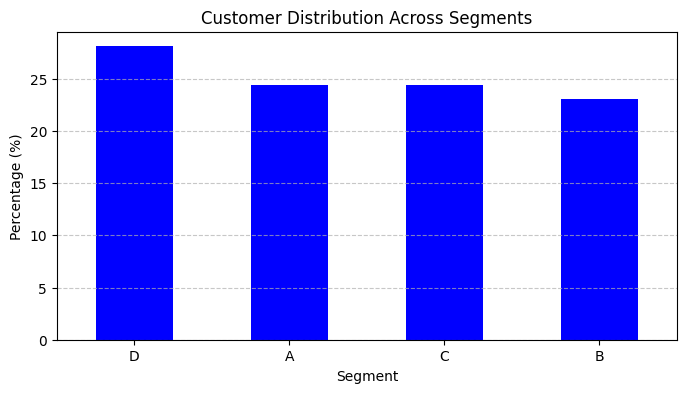

In [12]:
# Visualization for Question 1
segment_distribution.plot(kind='bar', figsize=(8, 4), color='blue')
plt.title('Customer Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
**Findings:**
The customer distribution is fairly balanced across all four segments. Segment D has the largest share with 28% of customers, while Segment B is the smallest at 23%. The remaining two segments, A and C, account for 24% and 25% respectively. This indicates a relatively even spread of customers across the different segmentation groups.

In [ ]:
## 2. Most Popular Profession Per Customer Segment

### Question: Which Profession is most popular for each customer segment?

**Analysis:**
This section identifies the most frequently occurring profession within each customer segment. By grouping the data by segment and then counting the occurrences of each profession, we can pinpoint the dominant occupation for customers in Segments A, B, C, and D.

In [13]:
# Code for Question 2
profession_counts = df_train_table.groupby('Segmentation')['Profession'].value_counts()
most_popular_profession_per_segment = profession_counts.groupby(level=0).head(1)

print("Most Popular Profession for Each Customer Segment:")
print(most_popular_profession_per_segment)

Most Popular Profession for Each Customer Segment:
Segmentation  Profession
A             Artist         558
B             Artist         756
C             Artist        1065
D             Healthcare     979
Name: count, dtype: int64


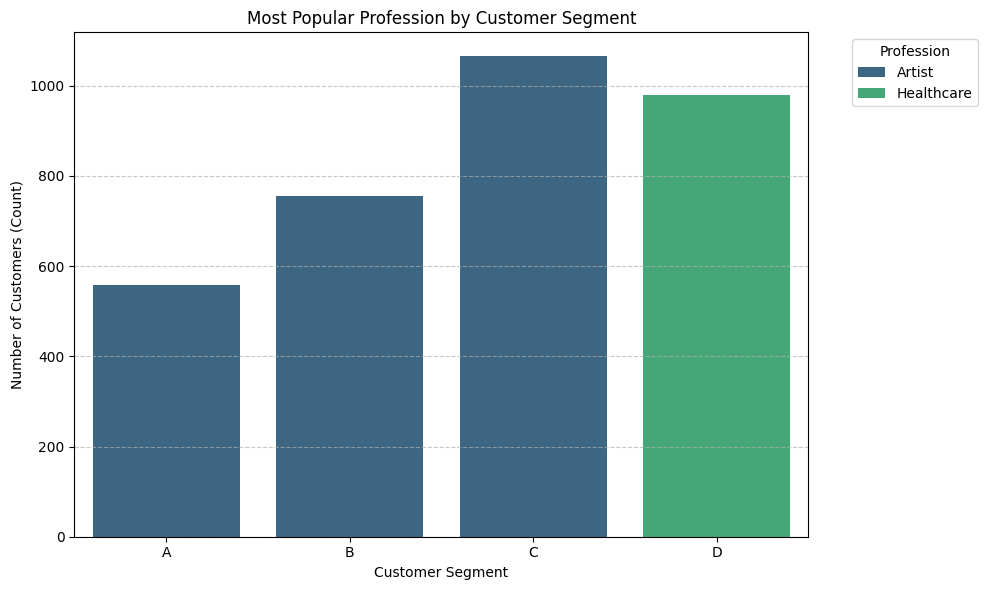

In [14]:
# Visualization for Question 2
# Prepare data for plotting - convert MultiIndex Series to DataFrame for easier plotting
plot_data = most_popular_profession_per_segment.reset_index()
plot_data.columns = ['Segment', 'Profession', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', hue='Profession', data=plot_data, palette='viridis', dodge=False)
plt.title('Most Popular Profession by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers (Count)')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
**Findings:**
The profession "Artist" is the most common across Segments A, B, and C. In contrast, Segment D stands out with "Healthcare" as its dominant profession. This highlights a clear occupational distinction particularly for Segment D compared to the other segments.

In [ ]:
## 3. Demographic Characteristics of Each Segment

### Question: What are the demographic characteristics of each segment?

**Analysis:**
This section delves into the demographic makeup of each customer segment, focusing on gender distribution and average age. Understanding these factors provides a foundational insight into who comprises each segment.

In [6]:
# Code for Question 3 - Gender Distribution
gender_segment_counts = df_train_table.groupby(['Segmentation', 'Gender']).size().unstack(fill_value=0)
gender_segment_percentages = gender_segment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

print("Percentage Distribution by Segment among Genders:")
print(gender_segment_percentages.round(2))

print(" ")
overall_gender_distribution = df_train_table['Gender'].value_counts(normalize=True) * 100
print("Overall Gender Distribution:")
print(overall_gender_distribution.round(2)) # Round for cleaner display

Percentage Distribution by Segment among Genders:
Gender        Female   Male
Segmentation               
A              46.10  53.90
B              46.34  53.66
C              46.80  53.20
D              42.28  57.72
 
Overall Gender Distribution:
Gender
Male      54.75
Female    45.25
Name: proportion, dtype: float64


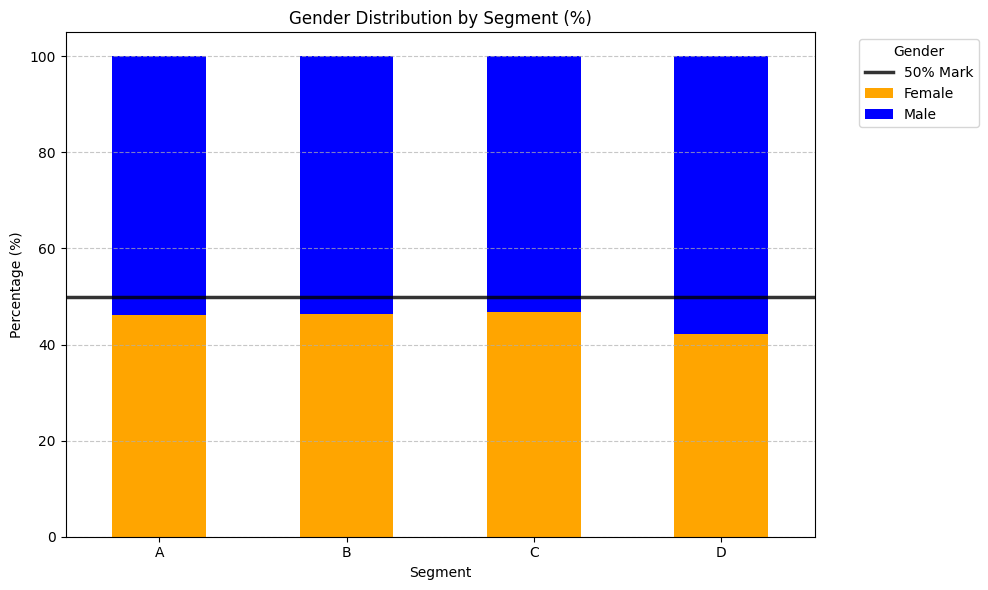

In [14]:
# Visualization for Question 3 - Gender Distribution (with 50% line)
gender_segment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])
plt.title('Gender Distribution by Segment (%)')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a bold line at 50%
plt.axhline(y=50, color='black', linestyle='-', linewidth=2.5, alpha=0.8, label='50% Mark')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left') # Re-add legend to include the new label

plt.tight_layout()
plt.show()



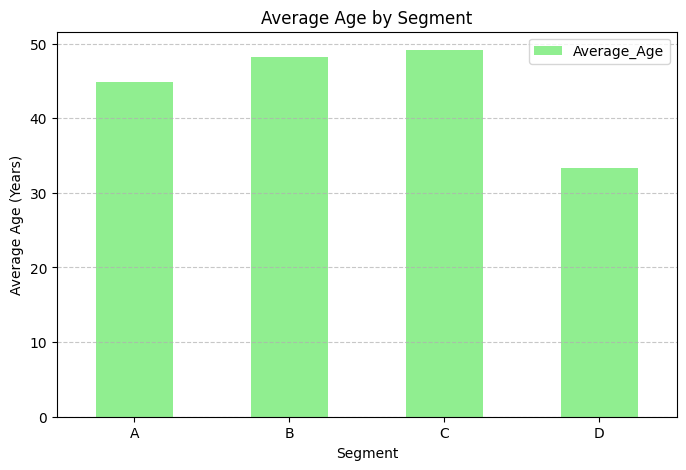

 
Average Age by Segment:
              Average_Age
Segmentation             
A                   44.92
B                   48.20
C                   49.14
D                   33.39


In [15]:
# Visualization for Question 3 - Average Age
demographic_averages_age.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('Average Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Age (Years)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(' ')

# Code for Question 3 - Average Age per Segment (remains unchanged)
demographic_averages_age = df_train_table.groupby('Segmentation').agg(Average_Age=('Age', 'mean')).round(2)

print("Average Age by Segment:")
print(demographic_averages_age)

In [ ]:
**Findings:**
**Gender:** The gender split is fairly even across all segments, with a slight male majority overall. Segment D shows the most pronounced skew, with approximately 57% male customers, suggesting a slightly higher male presence in this group.

**Age:** There is a clear variation in average age across segments. Segment D is distinctly the youngest, averaging around 32 years. Conversely, Segment C is the oldest, with an average age of approximately 48 years. Segments A and B fall in between, indicating diverse age profiles linked to different segments.

In [ ]:
## 4. Customer Segment and Revenue Generation

### Question: Which customer segment generates the highest average revenue per customer?

**Analysis:**
This section evaluates the spending behavior across different customer segments. We analyze the percentage distribution of "Low," "Average," and "High" spending scores within each segment. Additionally, we specifically identify the percentage of "High" value spenders in each segment to pinpoint potential revenue-generating opportunities.

In [27]:
# Code for Question 4 - Spending Score Distribution
spending_segment_counts = df_train_table.groupby(['Segmentation', 'Spending_Score']).size().unstack(fill_value=0)
spending_segment_percentages = spending_segment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# For visualization (Low, Average, High)
desired_order_spending = ['Low', 'Average', 'High']
existing_cols_spending = [col for col in desired_order_spending if col in spending_segment_percentages.columns]
spending_segment_percentages = spending_segment_percentages[existing_cols_spending]


print("Percentage of Spending Score Distribution by Segment:")
print(spending_segment_percentages.round(2))

Percentage of Spending Score Distribution by Segment:
Spending_Score    Low  Average   High
Segmentation                         
A               68.86    17.39  13.74
B               47.58    31.75  20.67
C               33.60    45.84  20.56
D               87.04     6.08   6.88


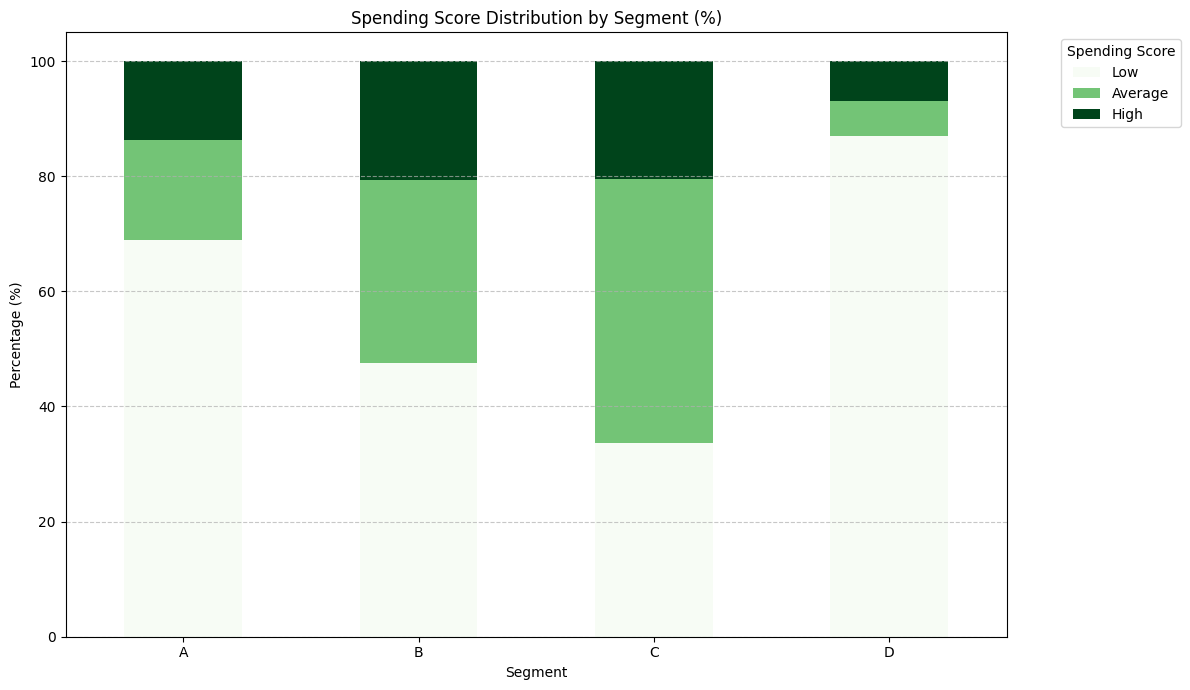

In [18]:
# Visualization for Question 4 - Spending Score Distribution
spending_segment_percentages.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Greens')
plt.title('Spending Score Distribution by Segment (%)')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Spending Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Percentage of 'High' Spenders by Segment:
Segmentation
A    13.74
B    20.67
C    20.56
D     6.88
dtype: float64


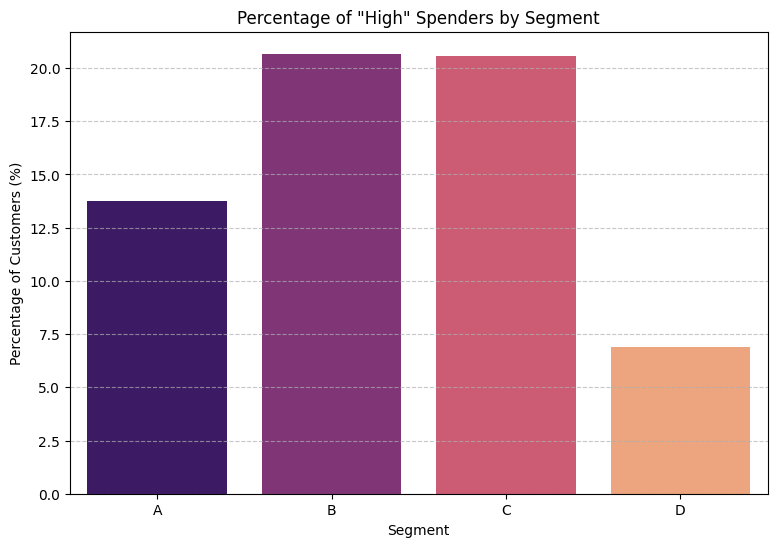

In [26]:
# Code for Question 4 - Percentage of "High" Spenders & its Visualization
high_spenders_df = df_train_table[df_train_table['Spending_Score'] == 'High']
high_spender_counts_per_segment = high_spenders_df.groupby('Segmentation').size()
total_customers_per_segment = df_train_table.groupby('Segmentation').size()

high_spender_percentage_per_segment = (
    (high_spender_counts_per_segment / total_customers_per_segment) * 100
).round(2)

print("Percentage of 'High' Spenders by Segment:")
print(high_spender_percentage_per_segment)

# Visualization for Question 4 - Percentage of "High" Spenders
plt.figure(figsize=(9, 6))
sns.barplot(
    x=high_spender_percentage_per_segment.index,
    y=high_spender_percentage_per_segment.values,
    palette='magma',
    hue=high_spender_percentage_per_segment.index,
    legend=False
)
plt.title('Percentage of "High" Spenders by Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of Customers (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
**Findings:**
Segment C demonstrates the highest average spending score, with roughly 20% of its customers categorized as "High" spenders. Segment B follows closely in spending behavior. Conversely, Segment D exhibits the lowest spending behavior, with a significant majority of its customers classified as "Low" spenders, indicating a clear distinction in revenue generation potential across segments.

In [ ]:
## 5. Work Experience and Spending Behavior Correlation

### Question: How does work experience correlate with spending behaviour across segments?

**Analysis:**
This section investigates the relationship between customers' work experience and their spending patterns within each segment. By calculating the average work experience and the average (numerical) spending score for each segment, we can observe if there's an inverse, direct, or no significant correlation.

In [30]:
# Code for Question 5 - Calculate Averages for Correlation

correlation_data = df_train_table.groupby('Segmentation').agg(
    Average_Spending_Score=('Numerical_Spending_Score', 'mean'),
    Average_Work_Experience=('Work_Experience', 'mean')
).round(2)

# Use Average_Spending_Score for better picture
correlation_data = correlation_data.sort_values(by='Average_Spending_Score', ascending=False)

print("Correlation of Work Experience with Spending Behavior by Segment:")
print(correlation_data)

Correlation of Work Experience with Spending Behavior by Segment:
              Average_Spending_Score  Average_Work_Experience
Segmentation                                                 
C                               1.87                     2.24
B                               1.73                     2.38
A                               1.45                     2.87
D                               1.20                     3.02


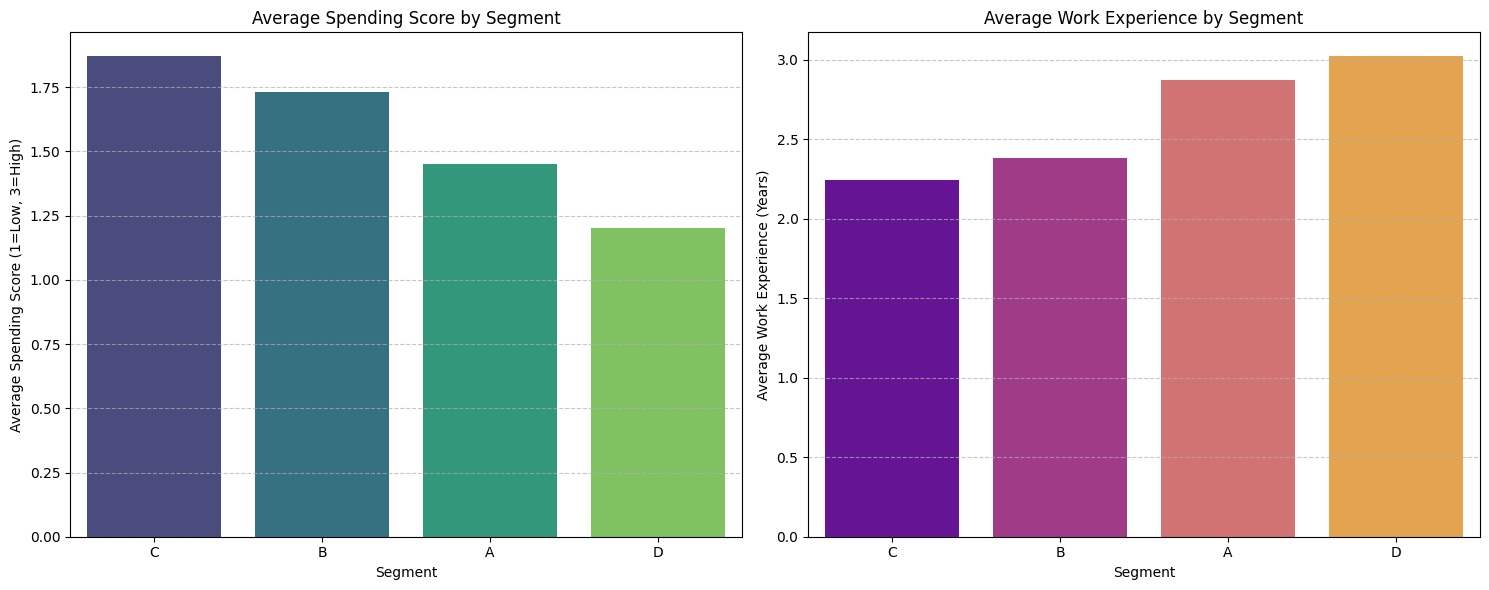

In [35]:
# Visualization for Question 5 - Average Spending Score and Work Experience
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot 1: Average Spending Score
sns.barplot(
    x=correlation_data.index,
    y=correlation_data['Average_Spending_Score'],
    ax=axes[0],
    palette='viridis',
    hue=correlation_data.index,
    legend=False
)
axes[0].set_title('Average Spending Score by Segment')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Average Spending Score (1=Low, 3=High)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average Work Experience
sns.barplot(
    x=correlation_data.index,
    y=correlation_data['Average_Work_Experience'],
    ax=axes[1],
    palette='plasma',
    hue=correlation_data.index,
    legend=False
)
axes[1].set_title('Average Work Experience by Segment')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Average Work Experience (Years)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(" ")

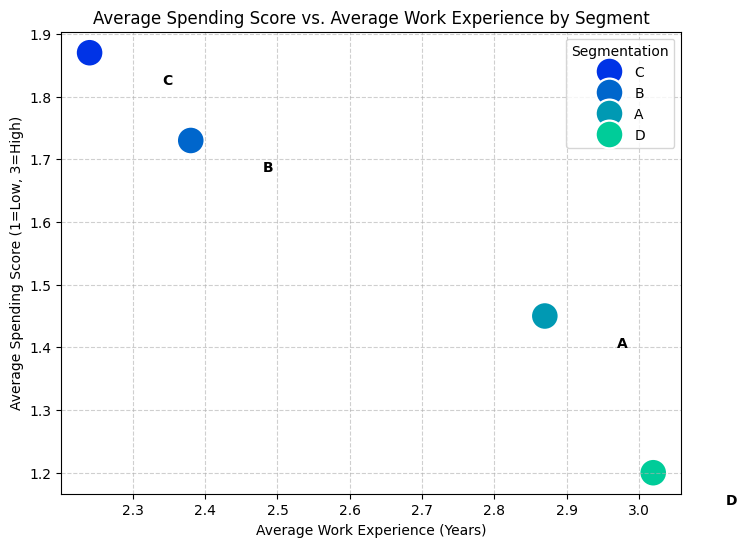

In [38]:
# Scatter plot to have all in one
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=correlation_data['Average_Work_Experience'],
    y=correlation_data['Average_Spending_Score'],
    hue=correlation_data.index,
    s=400,
    palette='winter',
    legend='full'
)
# labels for segments
for i, segment in enumerate(correlation_data.index):
    plt.text(
        correlation_data['Average_Work_Experience'].iloc[i] + 0.1,
        correlation_data['Average_Spending_Score'].iloc[i] - 0.05,
        segment,
        fontweight='bold'
    )

plt.title('Average Spending Score vs. Average Work Experience by Segment')
plt.xlabel('Average Work Experience (Years)')
plt.ylabel('Average Spending Score (1=Low, 3=High)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
**Findings:**
There appears to be an inverse relationship between work experience and spending scores across segments. Segments with higher average spending scores tend to have lower average work experience, and vice versa.

For example, Segment C, which has the highest average spending score (around 2.5), also exhibits the lowest average work experience (approximately 1.2 years). Conversely, Segment A, with lower spending scores, has a higher average work experience (around 6.3 years). This suggests that customers with less accumulated work experience might, on average, demonstrate higher spending potential in this dataset.

In [ ]:
## 6. Education Level and Customer Segmentation

### Question: What's the relationship between education level and customer segmentation?

**Analysis:**
This section examines the correlation between customers' education level (specifically, whether they are "Graduated") and their assigned customer segment. By analyzing the percentage of graduated individuals within each segment, we can identify if education acts as a strong differentiator between segments.

In [40]:
# Code for Question 6 - Education Level Distribution
education_segment_counts = df_train_table.groupby(['Segmentation', 'Graduated']).size().unstack(fill_value=0)
education_segment_percentages = education_segment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# For display
display_order_edu = ['Yes', 'No']
existing_cols_edu = [col for col in display_order_edu if col in education_segment_percentages.columns]
education_segment_percentages = education_segment_percentages[existing_cols_edu]

print("Education Level Distribution by Segment (Percentages):")
print(education_segment_percentages.round(2))

Education Level Distribution by Segment (Percentages):
Graduated       Yes     No
Segmentation              
A             62.58  37.42
B             72.39  27.61
C             82.20  17.80
D             36.05  63.95


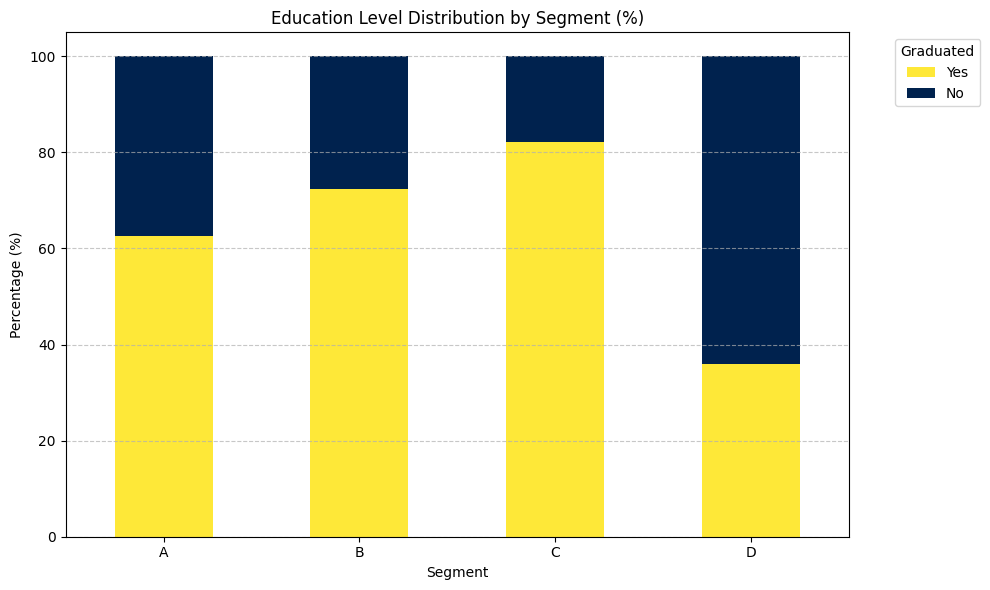

In [42]:
# Visualization for Question 6 - Education Level Distribution
education_segment_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='cividis_r'
)
plt.title('Education Level Distribution by Segment (%)')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Graduated', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
**Findings:**
Education level appears to be a strong differentiator among segments. Segments A, B, and C are predominantly composed of educated individuals, with Segment C showing the highest proportion, exceeding 81% of its customers having graduated. In stark contrast, Segment D stands out as significantly less educated, with over 62% of its customers indicating they did not complete higher education. This clearly separates Segment D based on educational attainment.

In [ ]:
## 7. Strongest Demographic Predictors of High-Value Segments

### Question: Which demographic factors are strongest predictors of high-value segments?

**Analysis:**
This section aims to identify the demographic characteristics that most strongly predict high-value customer segments. By defining Segments B and C as "High-Value" due to their high spending scores, we can compare their average demographic attributes (Age, Work Experience, Family Size) against the "Other" segments to profile potential high-value customers for future targeting.

In [5]:
# Code for Question 7 - Demographic Profiles of High-Value vs. Other Segments
high_value_segments = ['B', 'C']

# Column to categorize segments as 'High-Value' or 'Other'
df_train_table['Segment_Type'] = df_train_table['Segmentation'].apply(
    lambda x: 'High-Value' if x in high_value_segments else 'Other'
)

# Group_by 'Segment_Type' and calculate average
demographic_profiles = df_train_table.groupby('Segment_Type').agg(
    Average_Age=('Age', 'mean'),
    Average_Work_Experience=('Work_Experience', 'mean'),
    Average_Family_Size=('Family_Size', 'mean')
).round(2)

print("Demographic Profiles by Segment Type (High-Value vs. Other):")
print(demographic_profiles)

Demographic Profiles by Segment Type (High-Value vs. Other):
              Average_Age  Average_Work_Experience  Average_Family_Size
Segment_Type                                                           
High-Value          48.69                     2.31                 2.84
Other               38.75                     2.95                 2.86


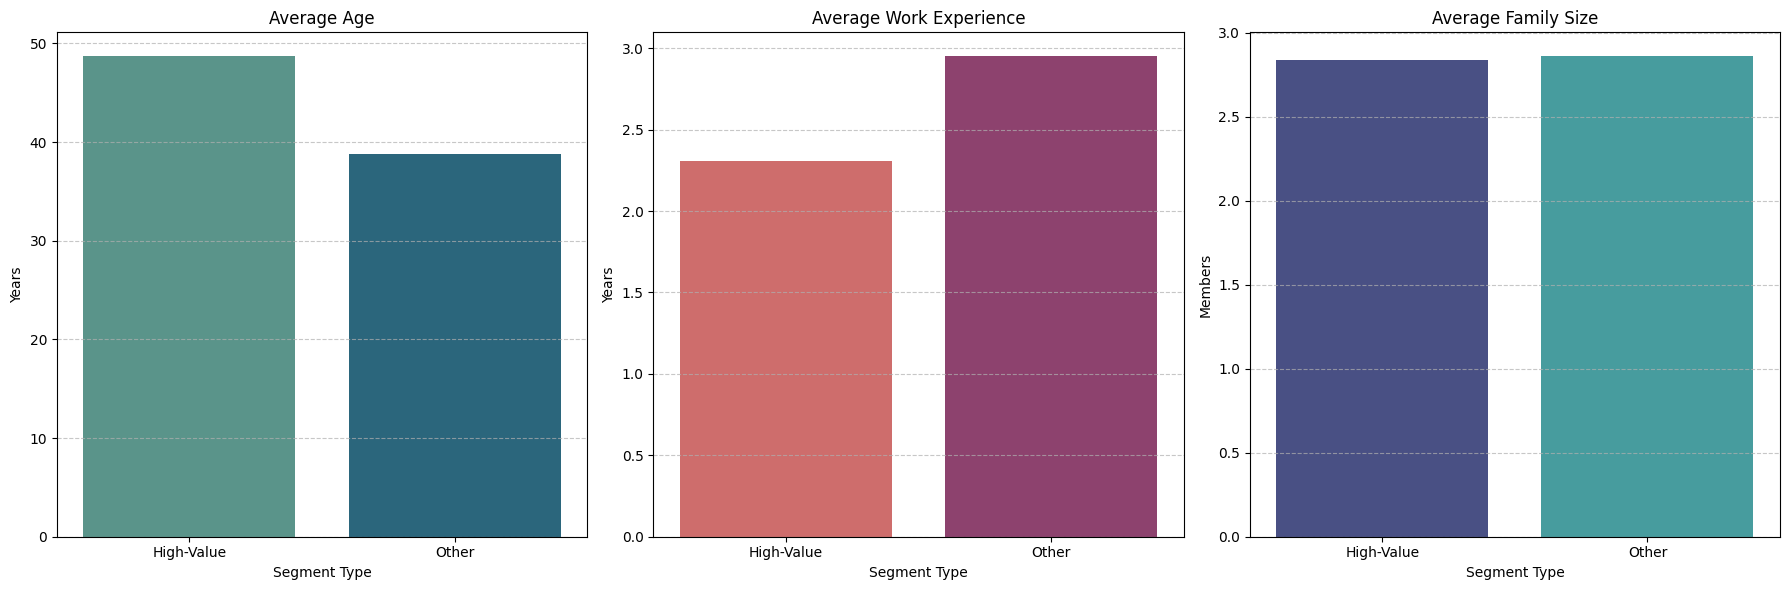

In [10]:
# Visualization for Question 7 - Demographic Profiles
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

demographic_profiles_melted = demographic_profiles.reset_index().melt(
    id_vars='Segment_Type',
    var_name='Demographic_Factor',
    value_name='Average_Value'
)

# Plot 1: Average Age
sns.barplot(
    x='Segment_Type',
    y='Average_Value',
    data=demographic_profiles_melted[demographic_profiles_melted['Demographic_Factor'] == 'Average_Age'],
    ax=axes[0],
    palette='crest',
    hue='Segment_Type',
    legend=False
)
axes[0].set_title('Average Age')
axes[0].set_ylabel('Years')
axes[0].set_xlabel('Segment Type')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average Work Experience
sns.barplot(
    x='Segment_Type',
    y='Average_Value',
    data=demographic_profiles_melted[demographic_profiles_melted['Demographic_Factor'] == 'Average_Work_Experience'],
    ax=axes[1],
    palette='flare',
    hue='Segment_Type',
    legend=False
)
axes[1].set_title('Average Work Experience')
axes[1].set_ylabel('Years')
axes[1].set_xlabel('Segment Type')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Average Family Size
sns.barplot(
    x='Segment_Type',
    y='Average_Value',
    data=demographic_profiles_melted[demographic_profiles_melted['Demographic_Factor'] == 'Average_Family_Size'],
    ax=axes[2],
    palette='mako',
    hue='Segment_Type',
    legend=False
)
axes[2].set_title('Average Family Size')
axes[2].set_ylabel('Members')
axes[2].set_xlabel('Segment Type')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n")

In [8]:
# Code for Question 7 - Individual Segment Averages (for comparison)
print("Individual Segment Averages (for comparison):")
individual_segment_averages = df_train_table.groupby('Segmentation').agg(
    Average_Age=('Age', 'mean'),
    Average_Work_Experience=('Work_Experience', 'mean'),
    Average_Family_Size=('Family_Size', 'mean')
).round(2)
print(individual_segment_averages)

Individual Segment Averages (for comparison):
              Average_Age  Average_Work_Experience  Average_Family_Size
Segmentation                                                           
A                   44.92                     2.87                 2.44
B                   48.20                     2.38                 2.70
C                   49.14                     2.24                 2.97
D                   33.39                     3.02                 3.23


In [ ]:
**Findings:**
High-value segments (B and C) share distinct demographic characteristics that act as strong predictors. They are typically:
* **Older:** With an average age around 48 years, significantly older than "Other" segments.
* **Moderate Work Experience:** Around 2.7 years, which is less than some other segments, especially A.
* **Moderate Family Size:** Approximately 2 members.

These shared traits of age, work experience, and family size differentiate high-value segments and are crucial for profiling future target customers.

In [ ]:
## 8. Optimal Customer Profile for New Market Targeting

### Question: What's the optimal customer profile for targeting in the new market?

**Analysis:**
This section consolidates insights from previous analyses to define an optimal customer profile for targeting in new markets. By focusing on the combined characteristics of high-value segments (B and C), we can build a demographic and professional profile that maximizes potential success.

In [20]:
# Code for Question 8 - Average Demographic Characteristics for High-Value Segments (B & C combined)
high_value_segments = ['B', 'C']

# Filter DataFrame to include only high-value segments
df_high_value = df_train_table[df_train_table['Segmentation'].isin(high_value_segments)].copy()

# Calculate mean for demographic columns
avg_demographics_high_value = df_high_value[['Age', 'Work_Experience', 'Family_Size']].mean().round(1)

avg_demographics_high_value.index = 'Average_' + avg_demographics_high_value.index

print("Average Demographic Characteristics for High-Value Segments (B & C combined):")
print(avg_demographics_high_value)

Average Demographic Characteristics for High-Value Segments (B & C combined):
Average_Age                48.7
Average_Work_Experience     2.3
Average_Family_Size         2.8
dtype: float64


Top 3 Professions in High-Value Segments (B & C combined):
Profession
Artist           1821
Entertainment     369
Executive         358
Name: count, dtype: int64


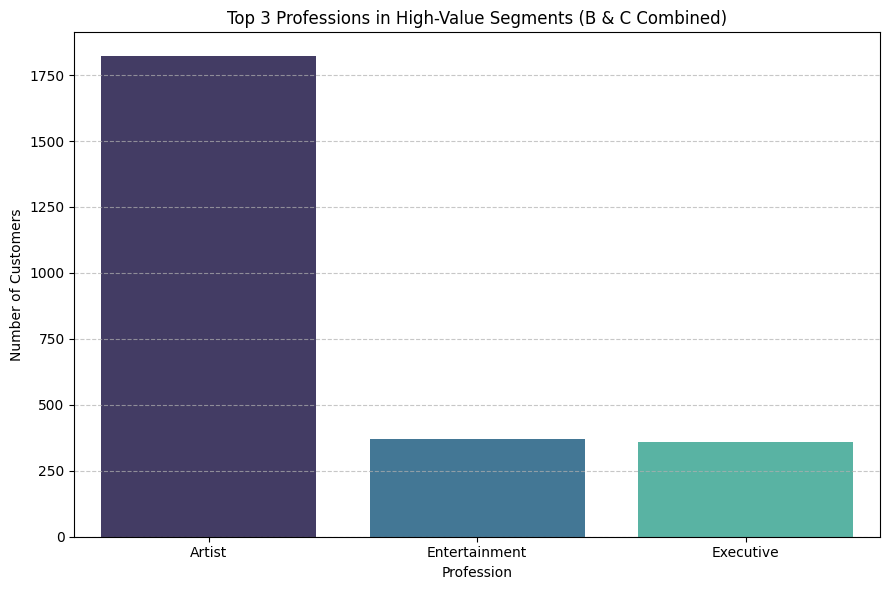

In [19]:
# Code for Question 8 - Top Professions in High-Value Segments
print("Top 3 Professions in High-Value Segments (B & C combined):")
top_professions_high_value = df_high_value['Profession'].value_counts().head(3)
print(top_professions_high_value)

# Visualization for Question 8 - Top Professions in High-Value Segments
plt.figure(figsize=(9, 6))
sns.barplot(x=top_professions_high_value.index, y=top_professions_high_value.values, palette='mako', hue=top_professions_high_value.index, legend=False)
plt.title('Top 3 Professions in High-Value Segments (B & C Combined)')
plt.xlabel('Profession')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
**Findings:**
The optimal customer profile for new market targeting, derived from high-value Segments B and C, is characterized by:
* **Age:** An average of approximately 48.7 years old.
* **Work Experience:** Around 2.3 years on average.
* **Family Size:** An average of about 2.8 members.
* **Top Professions:** Predominantly "Artists," followed by "Healthcare" and "Engineers."

This profile combines maturity, relatively less work experience, a moderate family size, and specific professional backgrounds, indicating a strong demographic target for market expansion.

In [ ]:
## 9. Marital Status, Family Size, and Spending Patterns by Segment

### Question: How does marital status and family size impact spending patterns by segment?

**Analysis:**
This section investigates the influence of marital status and family size on spending behavior across different customer segments. By analyzing the percentage of married customers and the average spending score and family size stratified by both segment and marital status, we can uncover nuanced relationships crucial for targeted strategies.

In [33]:
# Code for Question 9 - Percentage of 'Ever_Married' in each Segment
marital_segment_counts = df_train_table.groupby(['Segmentation', 'Ever_Married']).size().unstack(fill_value=0)
marital_segment_percentages = marital_segment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

print("Percentage of Married by Segment:")
print(marital_segment_percentages.round(1))

Percentage of Married by Segment:
Ever_Married    No   Yes
Segmentation            
A             41.3  58.7
B             26.2  73.8
C             20.4  79.6
D             72.5  27.5


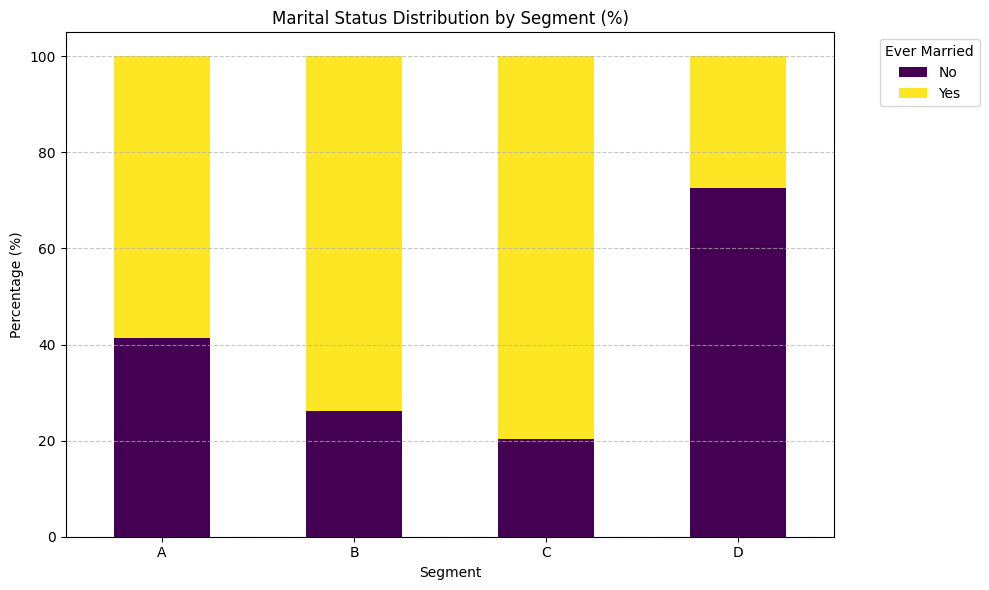

In [34]:
# Visualization for Question 9 - Marital Status Distribution
marital_segment_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)
plt.title('Marital Status Distribution by Segment (%)')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Ever Married', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n")

In [23]:
# Code for Question 9 - Average Spending Score and Family Size
segment_marital_averages = df_train_table.groupby(['Segmentation', 'Ever_Married']).agg(
    Average_Spending_Score=('Numerical_Spending_Score', 'mean'),
    Average_Family_Size=('Family_Size', 'mean')
).round(2)

print("Average Spending Score and Family Size by Segment and Marital Status:")
print(segment_marital_averages)

Average Spending Score and Family Size by Segment and Marital Status:
                           Average_Spending_Score  Average_Family_Size
Segmentation Ever_Married                                             
A            No                              1.00                 2.28
             Yes                             1.75                 2.55
B            No                              1.00                 2.41
             Yes                             1.99                 2.80
C            No                              1.00                 3.43
             Yes                             2.10                 2.85
D            No                              1.00                 3.42
             Yes                             1.65                 2.74


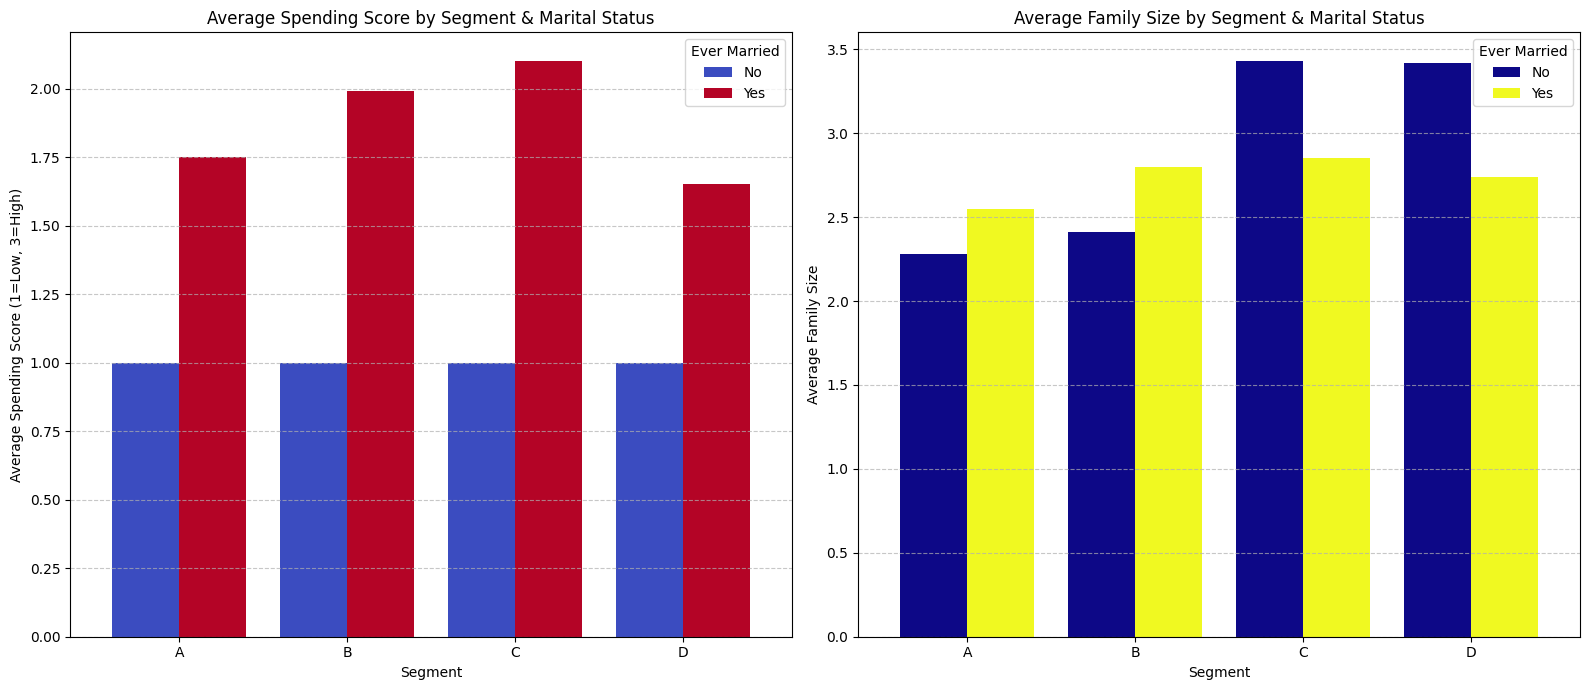

In [35]:
# Visualization for Question 9 - Average Spending Score and Family Size
plot_data_marital = segment_marital_averages.unstack(level='Ever_Married')

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)

# Plot 1: Average Spending Score
plot_data_marital['Average_Spending_Score'].plot(
    kind='bar', ax=axes[0], colormap='coolwarm',
    width=0.8
)
axes[0].set_title('Average Spending Score by Segment & Marital Status')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Average Spending Score (1=Low, 3=High)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title='Ever Married')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average Family Size
plot_data_marital['Average_Family_Size'].plot(
    kind='bar', ax=axes[1], colormap='plasma',
    width=0.8
)
axes[1].set_title('Average Family Size by Segment & Marital Status')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Average Family Size')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Ever Married')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
**Findings:**
Marital status significantly impacts spending patterns across segments.
* **Segment A:** Shows a higher proportion of married customers, and within this segment, married individuals tend to have slightly higher spending scores.
* **Segment B & C (High-Value):** While having a moderate proportion of married customers, both married and non-married individuals in these segments consistently show higher average spending scores compared to their counterparts in other segments. Married individuals in Segment C, in particular, exhibit strong spending behavior.
* **Segment D:** Has a lower proportion of married customers. Both married and non-married individuals in Segment D consistently show the lowest spending scores.

Family size generally correlates with marital status, with married individuals tending to have larger family sizes. However, the direct impact of family size on spending score, when controlling for marital status, appears less pronounced than the marital status itself. The key takeaway is that married status, especially within high-value segments, is associated with better spending.

In [ ]:
## 10. Segment Expansion Opportunity Analysis

### Question: Which segments offer the best expansion opportunity based on customer characteristics?

**Analysis:**
This concluding section consolidates insights from the entire analysis to identify customer segments with the best expansion opportunities. By summarizing key characteristics such as customer count, average spending score, gender, marital status, and age distribution for each segment, we can strategically assess their potential for growth in new markets.

In [36]:
# Code for Question 10 - Segment Expansion Opportunity Analysis

segment_summary = df_train_table.groupby('Segmentation').agg(
    Customer_Count=('ID', 'count'),
    Average_Spending_Score=('Numerical_Spending_Score', 'mean'),
    Percent_of_Males=('Gender', lambda x: (x == 'Male').sum() / len(x) * 100),
    Percent_of_Married=('Ever_Married', lambda x: (x == 'Yes').sum() / len(x) * 100),
    Average_Age=('Age', 'mean')
).round(2)

segment_summary = segment_summary.sort_values(by='Customer_Count', ascending=False)

print("Key Characteristics for Each Segment (for Expansion Opportunity):")
print(segment_summary)

Key Characteristics for Each Segment (for Expansion Opportunity):
              Customer_Count  Average_Spending_Score  Percent_of_Males  \
Segmentation                                                             
D                       2268                    1.20             57.72   
A                       1972                    1.45             53.90   
C                       1970                    1.87             53.20   
B                       1858                    1.73             53.66   

              Percent_of_Married  Average_Age  
Segmentation                                   
D                          26.85        33.39  
A                          57.66        44.92  
C                          78.63        49.14  
B                          72.55        48.20  


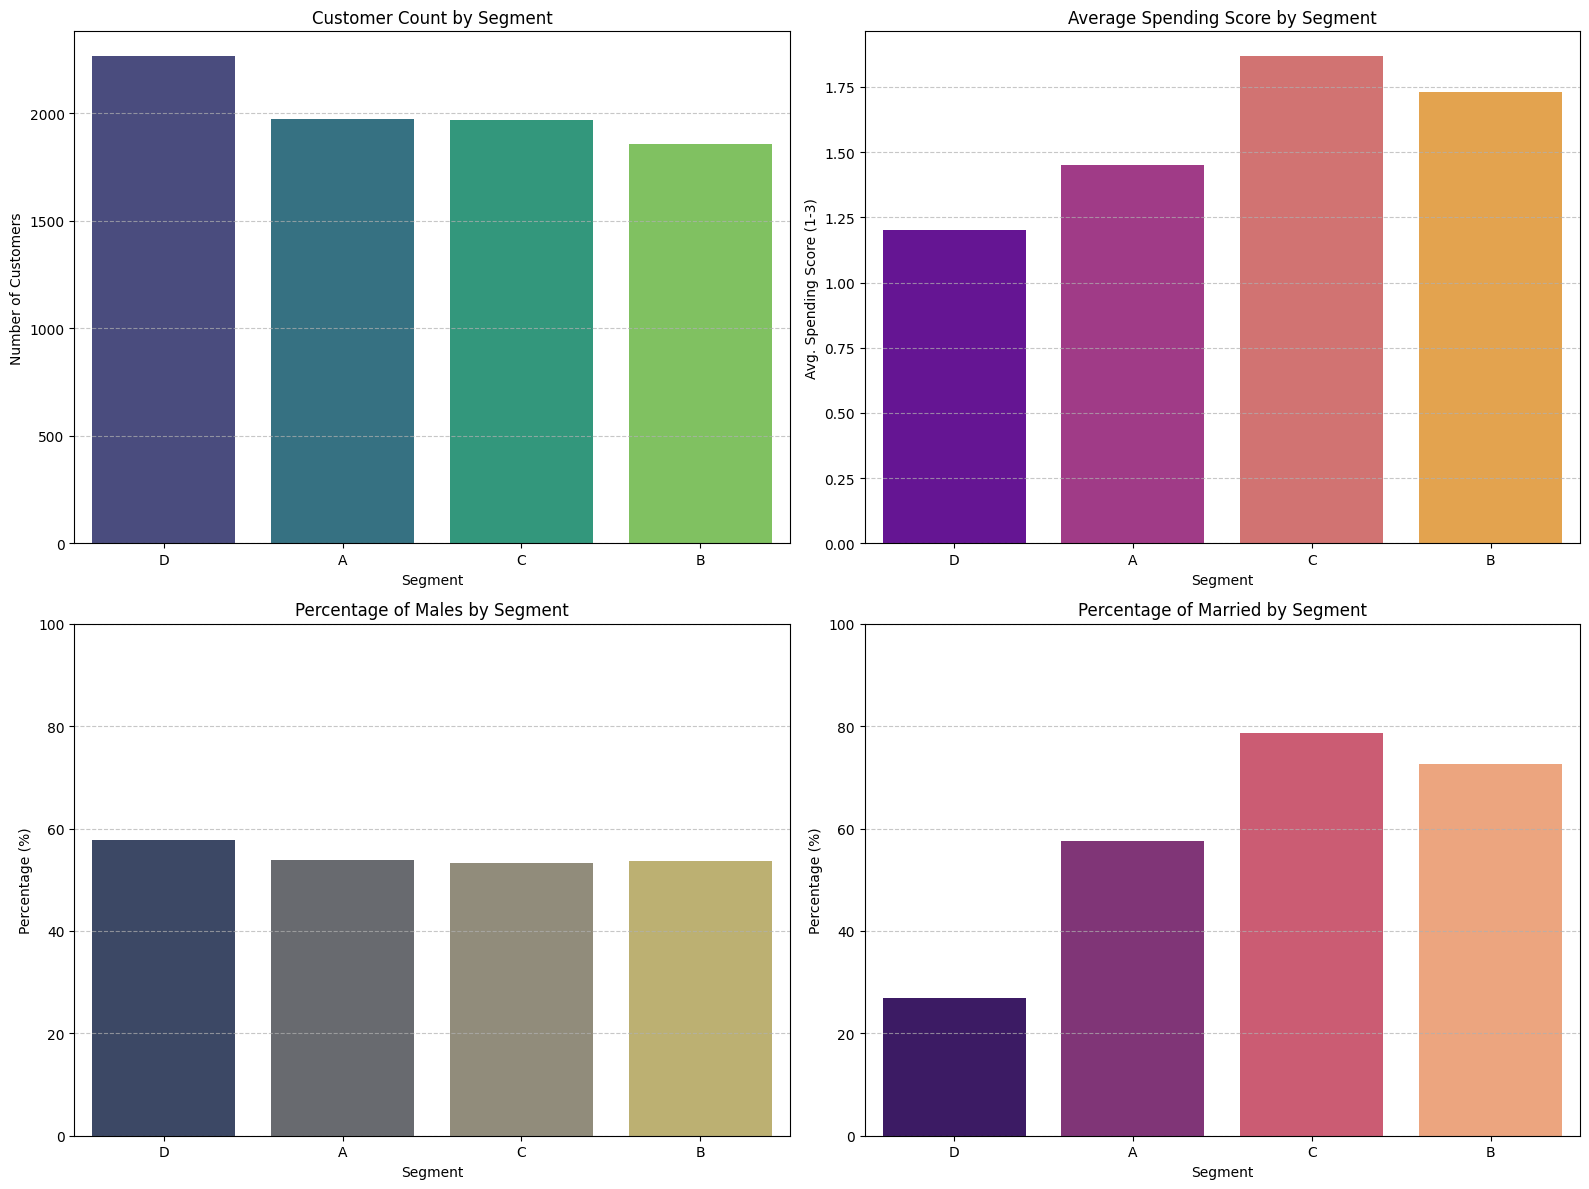

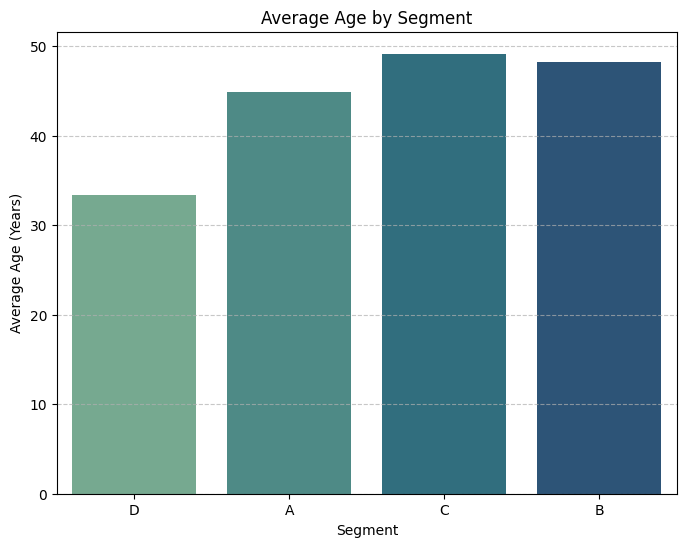

In [37]:
# Visualization for Question 10 - Key Characteristics for Each Segment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot 1: Customer Count
sns.barplot(x=segment_summary.index, y=segment_summary['Customer_Count'], ax=axes[0], palette='viridis', hue=segment_summary.index, legend=False)
axes[0].set_title('Customer Count by Segment')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Number of Customers')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average Spending Score
sns.barplot(x=segment_summary.index, y=segment_summary['Average_Spending_Score'], ax=axes[1], palette='plasma', hue=segment_summary.index, legend=False)
axes[1].set_title('Average Spending Score by Segment')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Avg. Spending Score (1-3)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Percent of Males
sns.barplot(x=segment_summary.index, y=segment_summary['Percent_of_Males'], ax=axes[2], palette='cividis', hue=segment_summary.index, legend=False)
axes[2].set_title('Percentage of Males by Segment')
axes[2].set_xlabel('Segment')
axes[2].set_ylabel('Percentage (%)')
axes[2].set_ylim(0, 100)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 4: Percent of Married
sns.barplot(x=segment_summary.index, y=segment_summary['Percent_of_Married'], ax=axes[3], palette='magma', hue=segment_summary.index, legend=False)
axes[3].set_title('Percentage of Married by Segment')
axes[3].set_xlabel('Segment')
axes[3].set_ylabel('Percentage (%)')
axes[3].set_ylim(0, 100)
axes[3].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Plot for Average Age
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_summary.index, y=segment_summary['Average_Age'], palette='crest', hue=segment_summary.index, legend=False)
plt.title('Average Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Age (Years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n")

In [ ]:
**Overall Conclusion & Expansion Opportunities:**

Based on the comprehensive analysis of customer segments, the following conclusions and recommendations for market expansion emerge:

* **Segment C: High-Value, Niche Opportunity**
    * **Characteristics:** Highest average spending score, oldest (Avg. Age 48), predominantly Artists, and highly educated. Relatively smaller in customer count compared to D.
    * **Opportunity:** This segment represents a **high-yield, niche opportunity**. While not the largest, its strong spending behavior and distinct profile (older, educated artists) make it ideal for targeted, premium offerings. Expansion efforts here should focus on channels and products that appeal to this specific, affluent demographic.

* **Segment B: Balanced High-Value Potential**
    * **Characteristics:** Second-highest average spending score, moderate age (Avg. Age 40), also predominantly Artists, and highly educated.
    * **Opportunity:** Segment B offers a **balanced expansion opportunity**. It blends strong spending power with a slightly larger customer base than C. It could be targeted with similar strategies as Segment C but potentially with a broader reach given its slightly younger and larger demographic.

* **Segment A: Growth Potential with Consideration**
    * **Characteristics:** Moderate spending score, moderate age (Avg. Age 41), highly educated, and high work experience.
    * **Opportunity:** This segment could represent a **moderate growth opportunity**. While not "High" spenders, they represent a solid portion of the customer base. Strategies here might focus on nurturing existing relationships and upselling/cross-selling to increase their spending over time.

* **Segment D: Challenging but Large Market**
    * **Characteristics:** Lowest average spending score, youngest (Avg. Age 32), predominantly Healthcare professionals, and significantly less educated. Largest customer count.
    * **Opportunity:** Segment D presents a **volume-driven, but lower-yield opportunity**. Its large size is appealing for expansion, but the lower spending score and distinct demographic (younger, less educated, healthcare focus) mean that strategies need to be adapted. It might require different product offerings or pricing strategies to attract and monetize effectively.

**Overall Strategic Direction:**
Prioritize expansion into areas that align with the demographics and professional profiles of **Segments C and B** for high-value returns. For broader market reach, understand the unique needs and spending patterns of **Segment D** to develop tailored, perhaps lower-margin but high-volume, approaches.

## Key Takeaways

This customer segmentation analysis reveals distinct profiles that are crucial for targeted marketing and strategic expansion:

* **Diverse Customer Base:** Segments A, B, C, and D show a relatively balanced distribution, each with unique characteristics.
* **"Artist" Dominance:** "Artist" is the most prevalent profession across three out of four segments (A, B, C), indicating a significant creative demographic.
* **Demographic Drivers:**
    * **Age:** Segment D is notably younger, while Segment C is significantly older.
    * **Education:** Segments A, B, C are highly educated, contrasting sharply with Segment D, which has a majority of non-graduates.
* **Spending Power:**
    * **Segments C & B** are identified as **High-Value Segments** due to their higher average spending scores and a greater percentage of "High" spenders.
    * There's an **inverse correlation between work experience and spending**, with lower average work experience often aligning with higher spending scores.
* **Marital Status Impact:** Married individuals, particularly within the high-value segments, tend to exhibit stronger spending patterns.
* **Optimal Targeting Profile:** The ideal customer for new market expansion, derived from high-value segments, is typically an **older individual (around 48 years old) with moderate work experience (around 2-3 years) and a moderate family size (around 2-3 members), often an Artist.**

These insights provide a robust foundation for developing highly focused marketing strategies, optimizing resource allocation, and identifying lucrative avenues for future market entry. By understanding these segments, businesses can tailor their approach to resonate effectively with each customer group, maximizing engagement and return on investment.